## **Jobsheet 9 | Pertemuan 9**
## **Perceptron & ANN**

### **Tugas**


*  Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
*  Anda diperbolehkan melakukan eksplorasi terhadap,
    1. Metode pra pengolahan
    2. Pemilihan fitur
    3. Arsitektur ANN
    4. Fungsi Aktiviasi

*  ANN diimplementasikan dengan menggunakan tensorflow.
*  DIKERJAKAN SECARA BERKELOMPOK
*  JELASKAN HASIL YANG ANDA DAPATKAN,
    1. AKURASI
    2. CONFUSION MATRIX
    3. KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam

## **Load Data**

In [2]:
# Unduh dataset MNIST dari scikit-learn
mnist = fetch_openml('mnist_784')

c:\Users\adien\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Pisahkan data gambar dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

## **Pra-pemrosesan**

### **Scaling**

In [4]:
X /= 255.0

### **Flatten**

In [5]:
#images = images.values.reshape(images.shape[0], -1)

## **Split Data**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Ektraksi Fitur**

In [7]:
# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 100 komponen)
n_components = 200  # Ubah sesuai dengan kebutuhan Anda
pca = PCA(n_components=n_components)

# Fit-transform pada data pelatihan
X_train_pca= pca.fit_transform(X_train)

# Transformasi data pengujian
X_test_pca = pca.transform(X_test)

## **Arsitektur Model ANN**

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(n_components,)),
    #layers.Input(shape = n_components),
    layers.Dense(n_components, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## **Kompilasi Model**

In [9]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 53714 (209.82 KB)
Trainable params: 53714 (209.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training Model**

In [13]:
history = model.fit(X_train_pca, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1400/1400 [==============================] - 4s 2ms/step - loss: 0.2640 - accuracy: 0.9259 - val_loss: 0.1364 - val_accuracy: 0.9568
Epoch 2/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.0961 - val_accuracy: 0.9701
Epoch 3/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9853 - val_loss: 0.1015 - val_accuracy: 0.9707
Epoch 4/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.1003 - val_accuracy: 0.9710
Epoch 5/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.1026 - val_accuracy: 0.9719
Epoch 6/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.1074 - val_accuracy: 0.9728
Epoch 7/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.1299 - val_accuracy:

In [14]:
# Kemudian Anda dapat mengakses informasi seperti ini:
loss = history.history['loss']  # Histori nilai loss pada setiap epoch
val_loss = history.history['val_loss']  # Histori nilai loss pada setiap epoch saat validasi
accuracy = history.history['accuracy']  # Histori nilai akurasi pada setiap epoch
val_accuracy = history.history['val_accuracy']  # Histori nilai akurasi pada setiap epoch saat validasi

print("Loss:")
print(loss)

print("Validation Loss:")
print(val_loss)

print("Accuracy:")
print(accuracy)

print("Validation Accuracy:")
print(val_accuracy)

Loss:
[0.2640492022037506, 0.0882457047700882, 0.049585457891225815, 0.03344859927892685, 0.019633958116173744, 0.01655232533812523, 0.014722315594553947, 0.010108007118105888, 0.012728027999401093, 0.010342735797166824, 0.007207653019577265, 0.009845341555774212, 0.00761457858607173, 0.008994377218186855, 0.009434684179723263, 0.005136293359100819, 0.005870066583156586, 0.007578776217997074, 0.006266801152378321, 0.0073263454250991344]
Validation Loss:
[0.13639821112155914, 0.09614657610654831, 0.10145855695009232, 0.10031414777040482, 0.1025601327419281, 0.10743188112974167, 0.12993842363357544, 0.13666163384914398, 0.13809439539909363, 0.11982482671737671, 0.12666258215904236, 0.16035504639148712, 0.15093842148780823, 0.16028465330600739, 0.1649852693080902, 0.16366489231586456, 0.1817604899406433, 0.16094166040420532, 0.17856401205062866, 0.16660308837890625]
Accuracy:
[0.9258705377578735, 0.9733259081840515, 0.9852901697158813, 0.9900223016738892, 0.9941071271896362, 0.99504464864

## **Evaluasi Model**

**Membuat Prediksi**

438/438 [==============================] - 1s 2ms/step


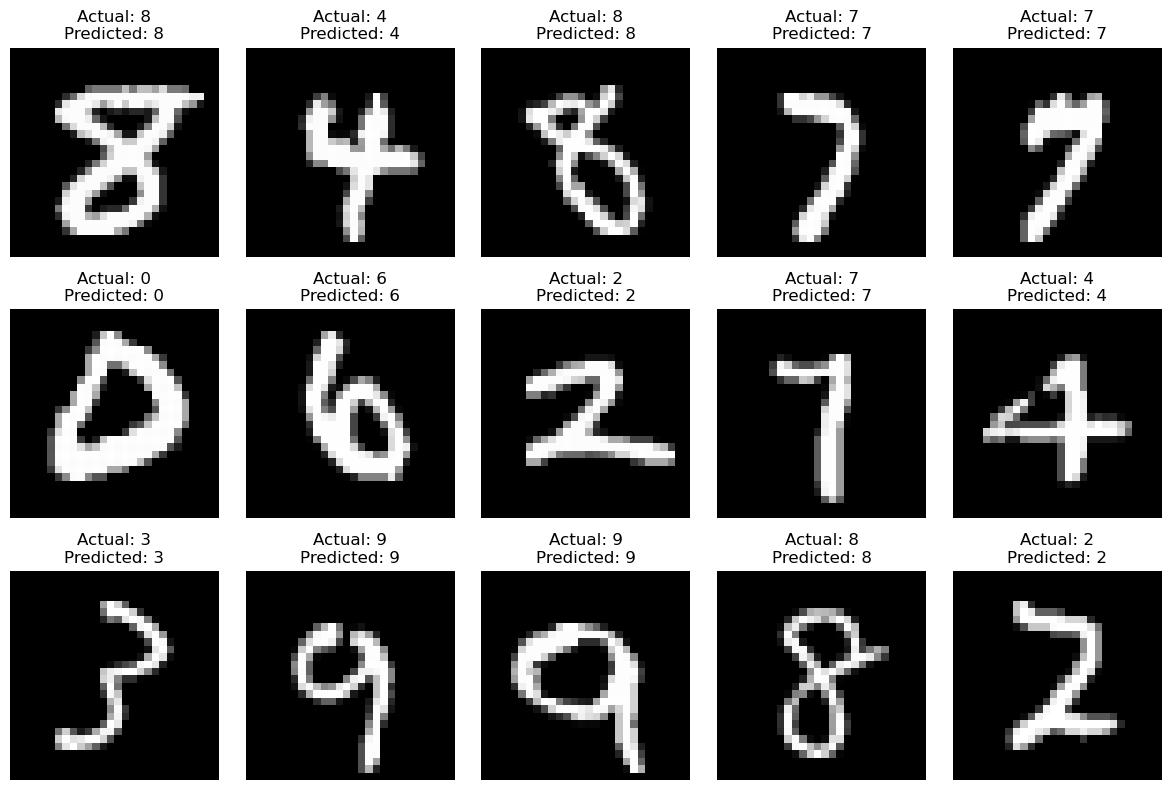

In [15]:
# Membuat prediksi pada data pengujian
predictions = model.predict(X_test_pca)
y_pred = np.argmax(predictions, axis=1)

# Menampilkan beberapa contoh hasil prediksi
num_examples_to_show = 15  # Ubah sesuai kebutuhan

# Mengatur tata letak subplot menjadi 3 baris dan 5 kolom (3x5)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(num_examples_to_show):
    sample_image = X_test.iloc[i].values
    actual_label = y_test.iloc[i]
    predicted_label = y_pred[i]

    # Menampilkan gambar di subplot yang sesuai
    ax = axes[i // 5, i % 5]
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')

    # Memeriksa apakah label sesuai
    if actual_label == predicted_label:
        title_color = 'black'
    else:
        title_color = 'red'

    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### **Akurasi**

In [16]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')

438/438 [==============================] - 1s 1ms/step - loss: 0.1875 - accuracy: 0.9724
Akurasi pada data pengujian: 0.97


In [17]:
train_loss, train_acc = model.evaluate(X_train_pca, y_train)
print(f'Akurasi pada data pelatihan: {train_acc:.2f}')

1750/1750 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9944
Akurasi pada data pelatihan: 0.99


### **Confusion Matriks**

In [21]:
# Membuat matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(confusion)

Matriks Kebingungan:
[[1308    1    2    1    3    3   11    8    5    1]
 [   0 1585    3    2    2    0    0    7    1    0]
 [   0    6 1349    3    3    0    2    6    9    2]
 [   1    1   13 1386    0   15    0    6    7    4]
 [   0    0    3    1 1262    0    6    2    4   17]
 [   2    3    0   14    2 1222   11    2   13    4]
 [   5    3    1    1    2    3 1376    0    5    0]
 [   2    1   16    0    5    1    1 1460    3   14]
 [   4    8    9    6    4    5    3    4 1307    7]
 [   4    3    2    8   18    3    0   10   13 1359]]


### **Konfigurasi Model**

*   **Lapisan Input**: Lapisan ini menerima representasi gambar setelah reduksi dimensi PCA, dan meratakan data menjadi satu dimensi. Ini penting karena sebagian besar model ANN mengharapkan masukan dalam bentuk vektor satu dimensi.

*   **Hidden Layers**: Ada dua lapisan tersembunyi dengan aktivasi ReLU. Jumlah neuron pada lapisan pertama adalah 128, dan pada lapisan kedua adalah 64. Penggunaan ReLU digunakan untuk mengatasi masalah non-linearitas.

*   **Output Layer**: Lapisan keluaran memiliki 10 neuron, yang sesuai dengan jumlah kelas yang mungkin dalam klasifikasi digit dari 0 hingga 9. Penggunaan fungsi aktivasi softmax di lapisan ini menghasilkan probabilitas distribusi kelas, yang memungkinkan model mengeluarkan prediksi kelas yang paling mungkin.

*   **Learning Rate dan Optimizer** : Learning rate sebesar 0.001 digunakan dengan optimizer Adam. Nilai ini adalah pilihan yang umum dan seringkali memberikan konvergensi yang baik dalam pelatihan. Adam adalah optimizer yang efisien dan adaptif yang banyak digunakan dalam deep learning.

*   **Fungsi Kerugian** ('sparse_categorical_crossentropy'): Fungsi kerugian yang digunakan 'sparse_categorical_crossentropy'. Fungsi ini mengukur kesalahan dalam klasifikasi dan membantu model untuk mengoptimalkan prediksi kelas.
